# Heart disease prediction (Classification) using Keras Deep Learning

#### It is a good test dataset for neural networks because all of the input values are numerical and have the same scale.
https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

https://medium.com/@manasnarkar/heart-disease-prediction-using-keras-deep-learning-960a1b7b98ee
https://github.com/rtflynn/Heart-Disease-Model
https://github.com/sharmaroshan/Heart-UCI-Dataset/blob/master/Heart_UCI.ipynb

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split 

#from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
#from sklearn.naive_bayes import GaussianNB
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier

# pip install --user tensorflow
# pip install keras

#import keras 
from keras.models import Sequential  
from keras.layers import Dense, ReLU, Dropout

### Load Data

In [138]:
url = "https://github.com/sharmaroshan/Heart-UCI-Dataset/raw/master/heart.csv"

There are 303 records in the dataset and contains 14 continuous attributes. The goal is to predict the presence of heart disease in the patient.

Here are the 14 attributes from the dataset along with their descriptions. These attributes have been narrowed down to total of 14 in the dataset from the original set of 76 .

    age: The person’s age in years
    sex: The person’s sex (1 = male, 0 = female)
    cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4:    asymptomatic)
    trestbps: The person’s resting blood pressure
    chol: The person’s cholesterol measurement in mg/dl
    fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
    restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes’ criteria)
    thalach: The person’s maximum heart rate achieved
    exang: Exercise induced angina (1 = yes; 0 = no)
    oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot)
    slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
    ca: The number of major vessels (0–3)
    thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
    target: Heart disease (0 = no, 1 = yes)

In [139]:
raw_data = pd.read_csv(url)
raw_df= pd.DataFrame(raw_data)

### Exploratory Data Analysis

In [140]:
raw_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [141]:
# getting the info of the data
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [142]:
# Check any Missing, NA, Data
raw_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [143]:
# describing the data

raw_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [144]:
# 
raw_df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0.5, 0, '')

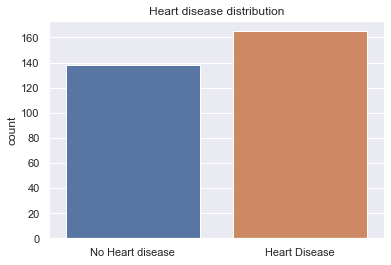

In [145]:
#plot the distribution between the heart disease and absence of it
f = sns.countplot(x='target', data=raw_df)
f.set_title("Heart disease distribution")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("")

Text(0.5, 0, '')

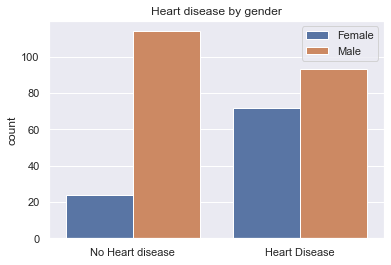

In [146]:
# plot distribution for male and female gender
f = sns.countplot(x='target', data=raw_df, hue='sex')
plt.legend(['Female', 'Male'])
f.set_title("Heart disease by gender")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("")

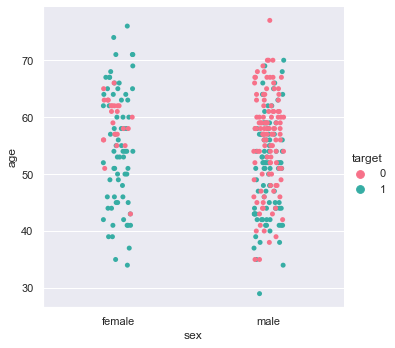

In [147]:
# Set figure size 
sns.set( rc = {'figure.figsize' : ( 20, 20 ),  
               'axes.labelsize' : 12 }) 
g=sns.catplot(data=raw_df, x='sex', y='age',  hue='target', palette='husl')
g.set_xticklabels(['female', 'male'])
#g.legend(['No Heart disease', 'Heart Disease'])

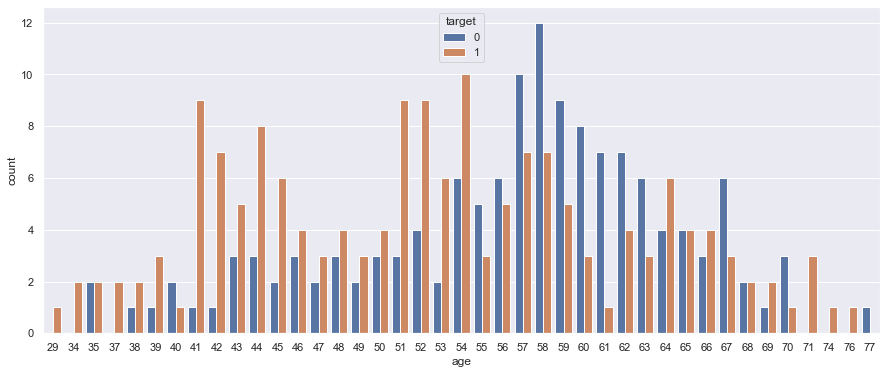

In [148]:
# What age has high risk of heat disase?

plt.figure(figsize=(15,6))
sns.countplot(x='age',data = raw_df, hue = 'target')
plt.show()

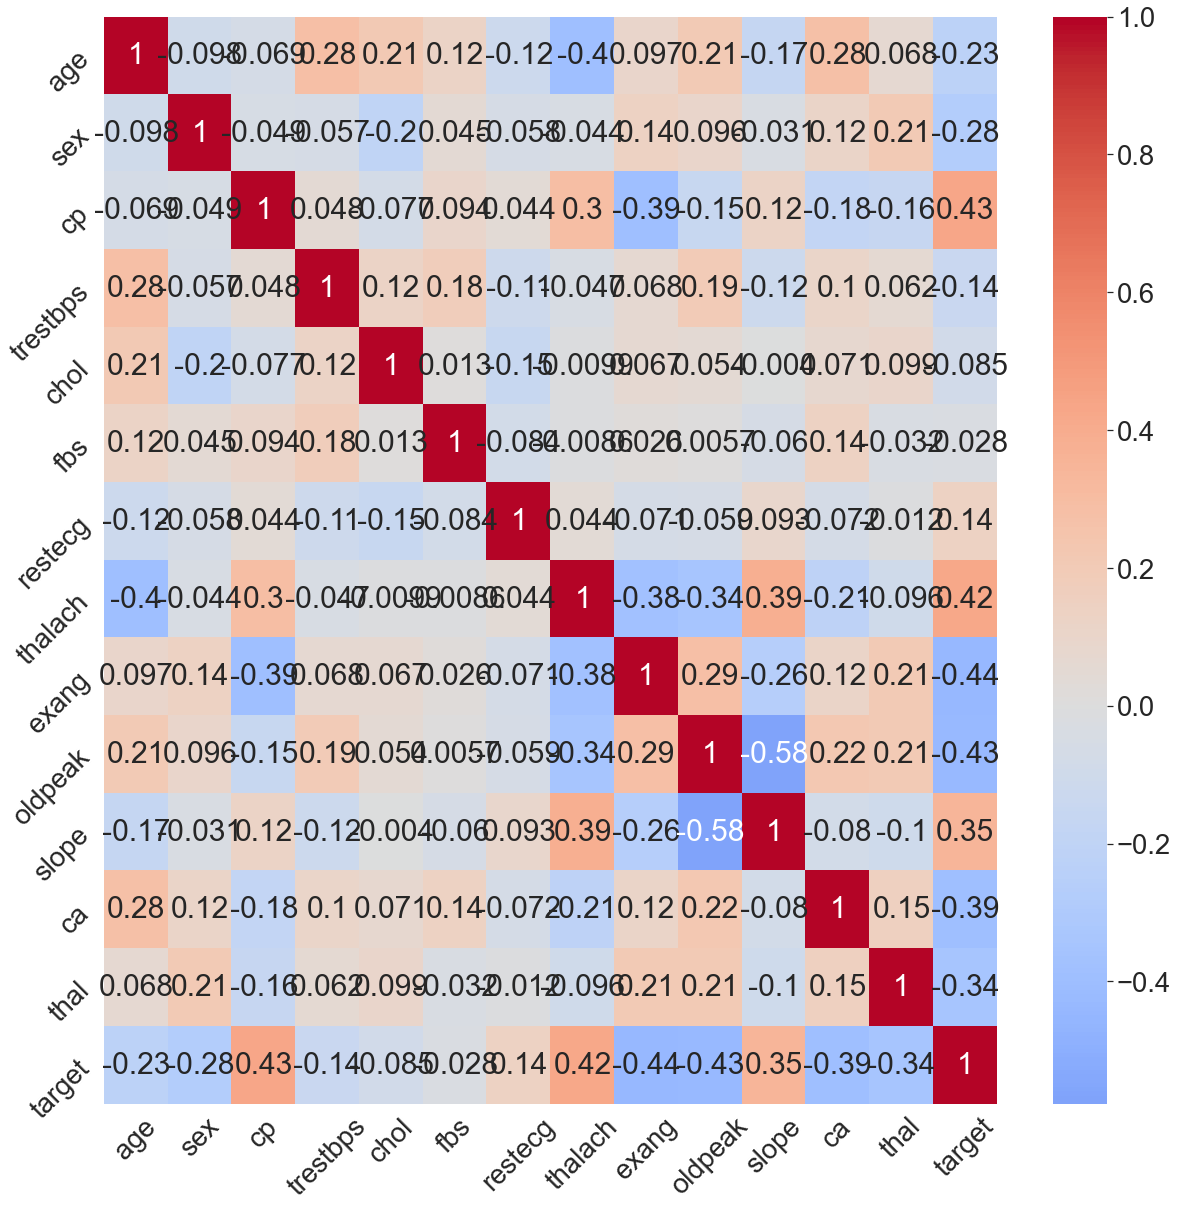

In [149]:
#plot a heatmap of correlation matrix as below.

sns.set(font_scale=2.5)
heat_map = sns.heatmap(raw_df.corr(method='pearson'), annot=True,cmap='coolwarm',center=0)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45)
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=45);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Defa

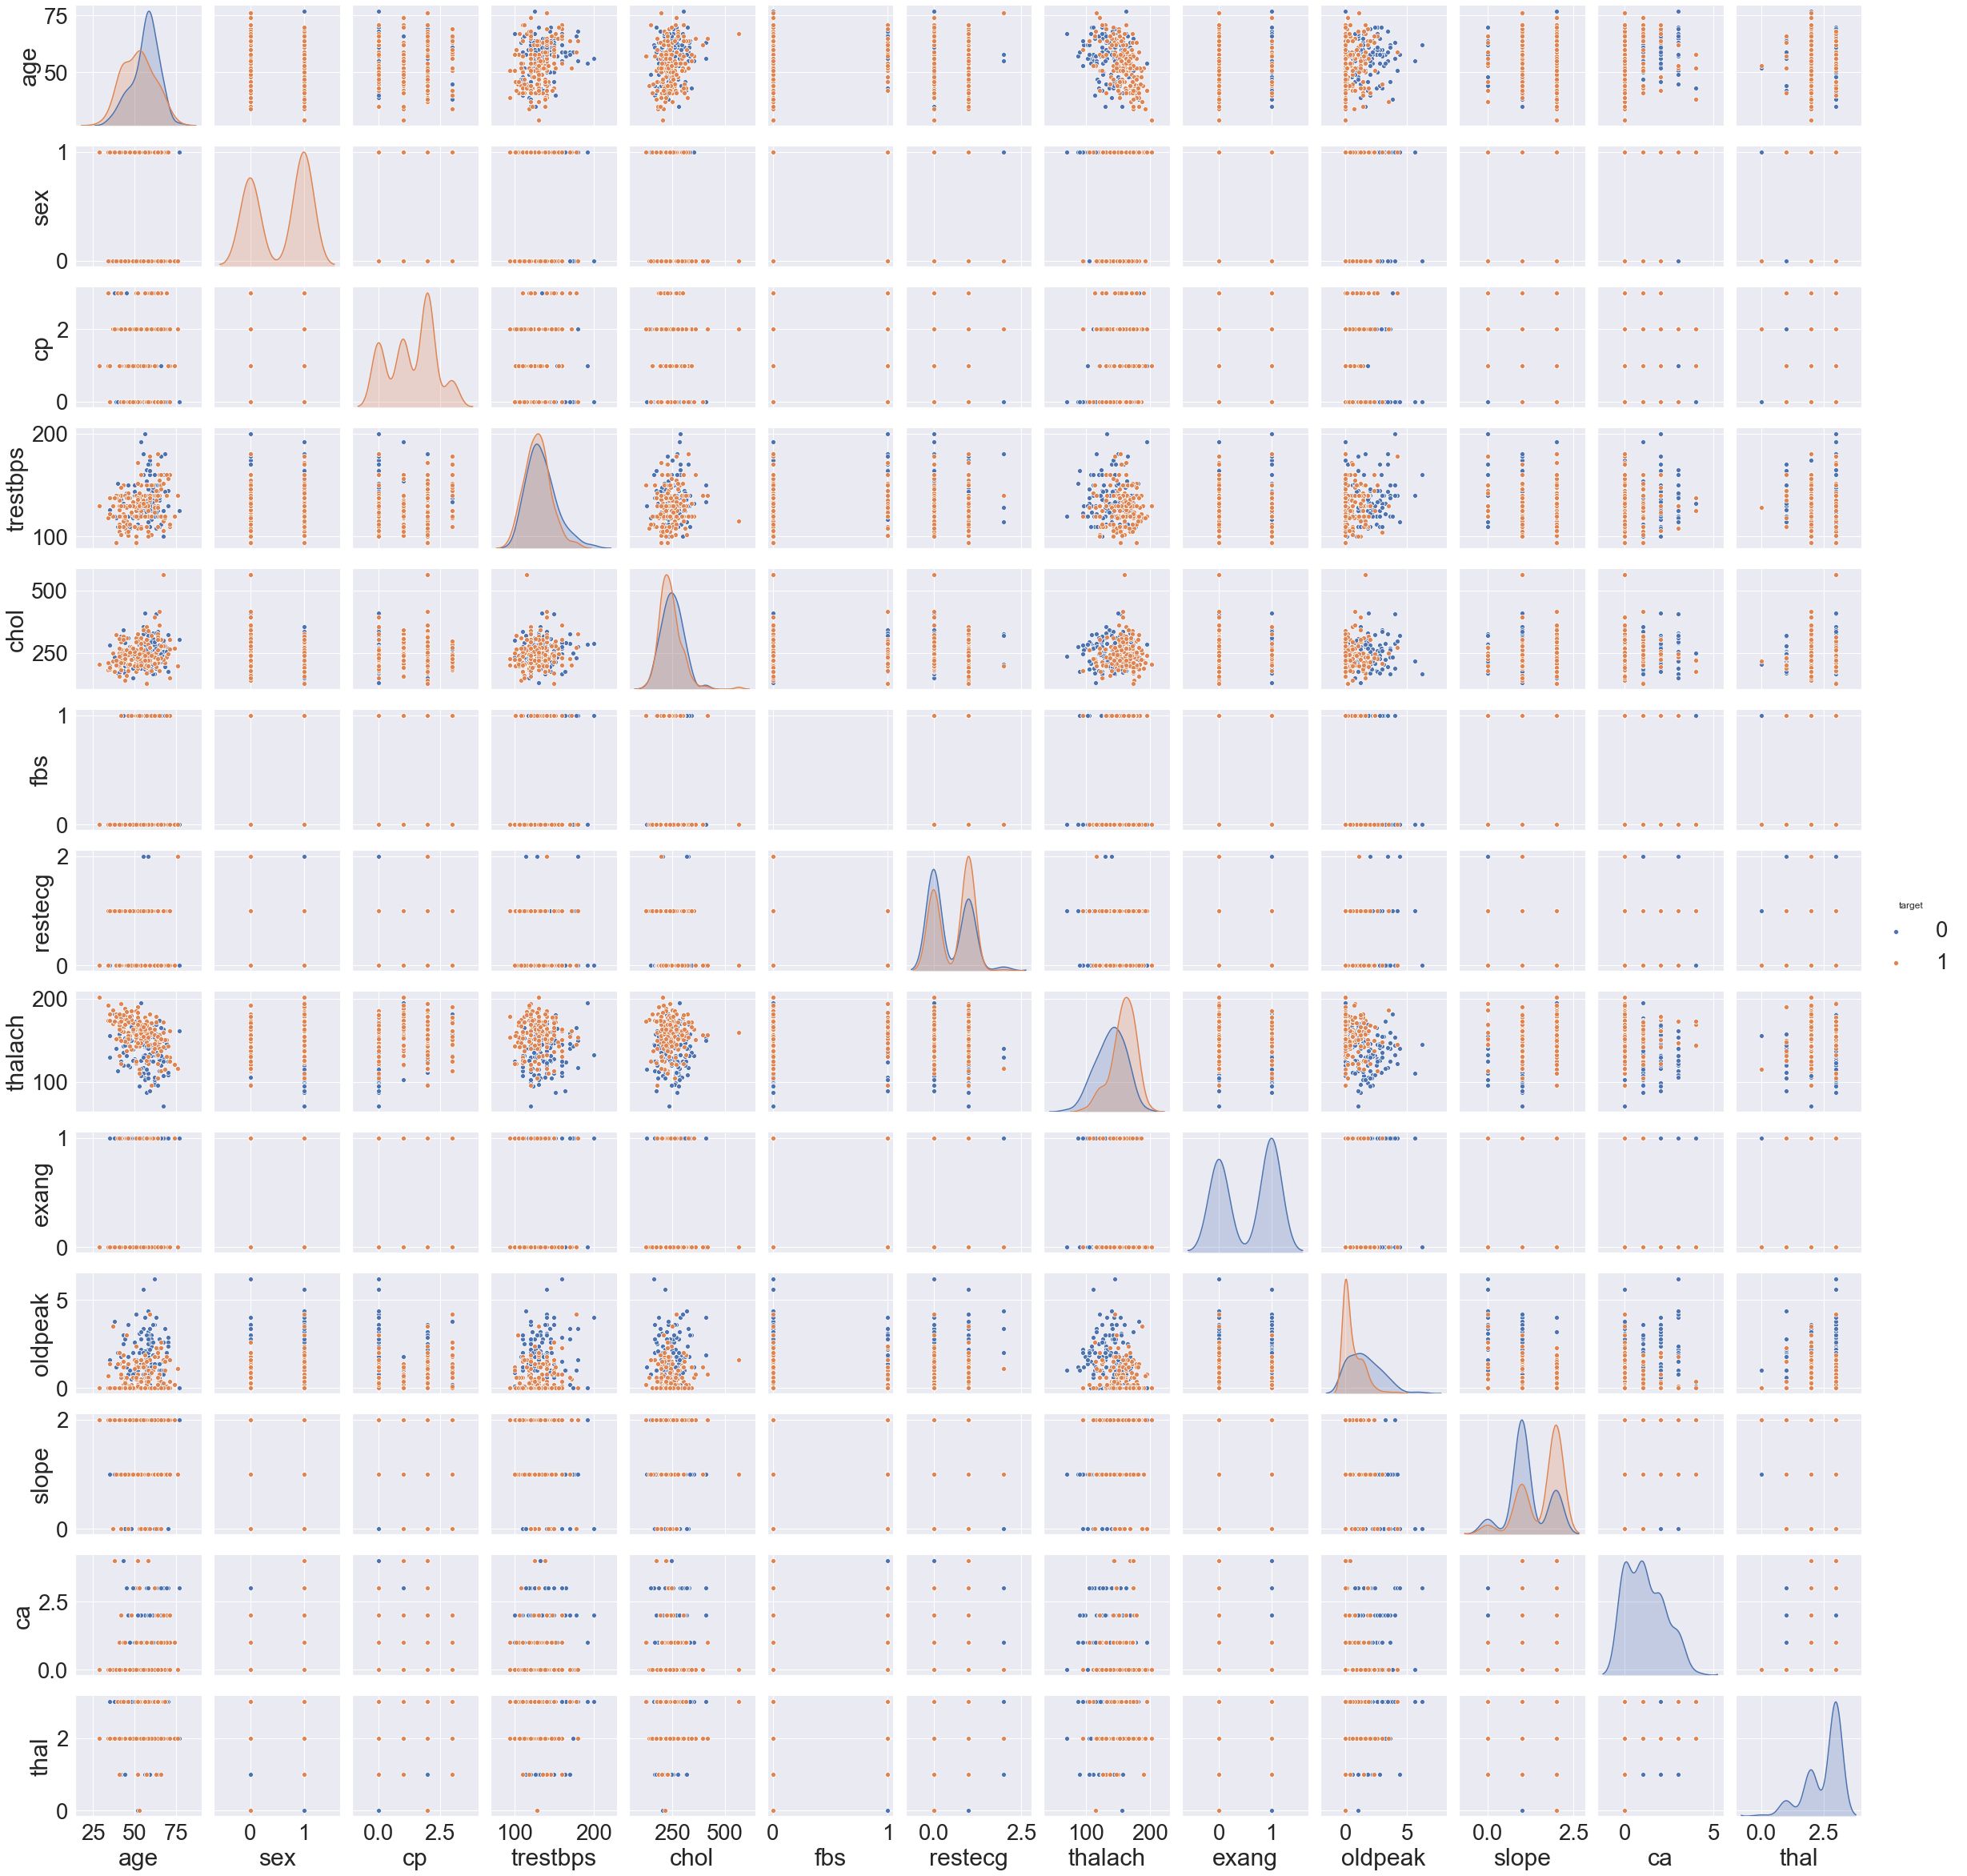

In [150]:
#Scatterplot Matrix
sns.pairplot(raw_df, hue="target")

#### Obviously there is no strong correlation between any of the 14 attributes.

### build a Keras classifier to predict the heart disease. We split the dataset into two sets: training set and testing set. 

In [151]:
X = raw_df.iloc[:,:-1]  # feature
y = raw_df['target'] # target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=100)
# we can check their dimension
print(X_train.shape)
print(X_test.shape)

(242, 13)
(61, 13)


In [152]:
# to standardize the data:
# MinMaxScaler doesn't distort the distances between the values in each feature.
from sklearn.preprocessing import Normalizer, MinMaxScaler
 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#### Which features are the most important in relation to heart disease? let's find out by using XGBoost classifier


Text(0.5, 0, 'Permutation Importance')

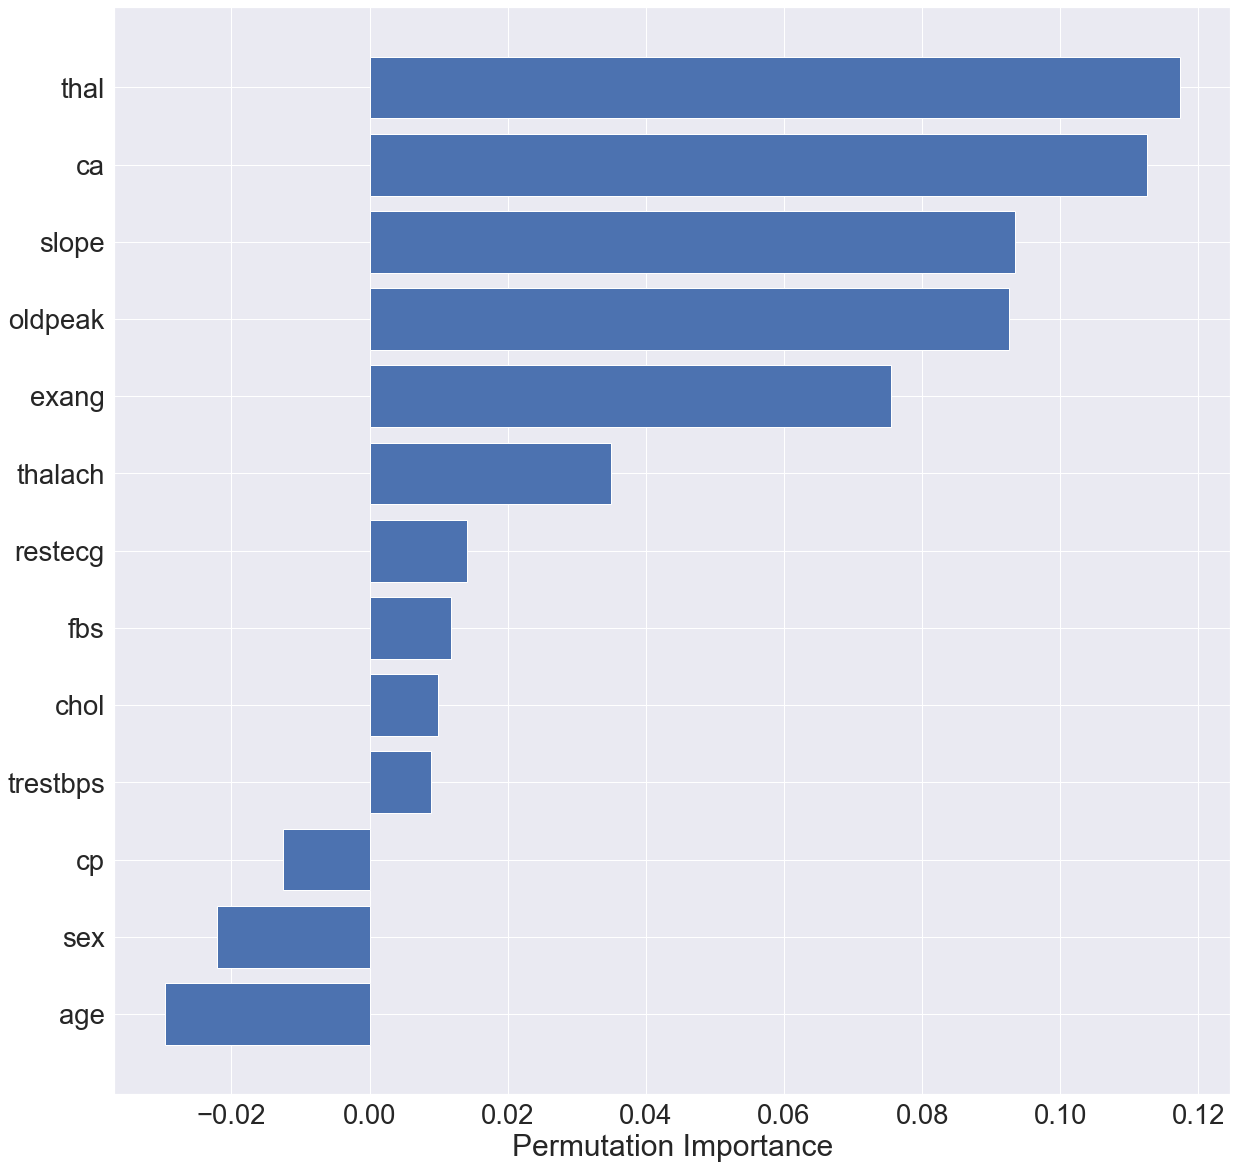

In [153]:
from xgboost import XGBRegressor   # pip install xgboost
from sklearn.inspection import permutation_importance
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train_scaled, y_train)
perm_importance = permutation_importance(xgb, X_test_scaled, y_test)
sorted_idx = perm_importance.importances_mean.argsort()

plt.barh(X_train.columns.tolist(), perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")


In [154]:
#create model
model = Sequential()

# create 3 dense layers
# relu : Applies the rectified linear unit activation function
# With default values, this returns the standard ReLU activation: max(x, 0), the element-wise maximum of 0 and the input tensor.
# Input layer has 80 neurons and the relu activation function.
model.add(Dense(80, input_dim=13, activation='relu'))

 # Dropout layer which helps prevent overfitting. one in 10 inputs will be randomly excluded from each update cycle.
#model.add(Dropout(0.1))   # don't need Dropout layyers because only 13 features

# second layer 
model.add(Dense(80, activation='relu'))
#model.add(Dropout(0.1))
# third layer
model.add(Dense(80, activation='relu')) 
#model.add(Dropout(0.1))
# output layer
# Output layer has a single neuron (output) an sigmoid activation function suited for binary classification problems.
#  The sigmoid function always returns a value between 0 and 1.
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))


In [155]:
# compile and fit the model

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train_scaled,y_train, epochs=100, verbose=1)

Epoch 1/100
8/8 [==============================] - 1s 1ms/step - loss: 0.6945 - accuracy: 0.4166
Epoch 2/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6810 - accuracy: 0.6058
Epoch 3/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6644 - accuracy: 0.6666
Epoch 4/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6323 - accuracy: 0.7638
Epoch 5/100
8/8 [==============================] - 0s 1ms/step - loss: 0.5875 - accuracy: 0.7874
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5150 - accuracy: 0.8323
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.7933
Epoch 8/100
8/8 [==============================] - 0s 1ms/step - loss: 0.4184 - accuracy: 0.8298
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4286 - accuracy: 0.8026
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.8055
Epoch 11/100
8/8 [===========

8/8 [==============================] - 0s 1ms/step - loss: 0.0819 - accuracy: 0.9818
Epoch 85/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0632 - accuracy: 0.9897
Epoch 86/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0595 - accuracy: 0.9868
Epoch 87/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0474 - accuracy: 0.9923
Epoch 88/100
8/8 [==============================] - 0s 999us/step - loss: 0.0618 - accuracy: 0.9705
Epoch 89/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0599 - accuracy: 0.9862
Epoch 90/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0652 - accuracy: 0.9798
Epoch 91/100
8/8 [==============================] - 0s 999us/step - loss: 0.0658 - accuracy: 0.9722
Epoch 92/100
8/8 [==============================] - 0s 999us/step - loss: 0.0648 - accuracy: 0.9801
Epoch 93/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 0.9868
Epoch 94/100
8/8 [=========

https://medium.com/@manasnarkar/heart-disease-prediction-using-keras-deep-learning-960a1b7b98ee

Compile function has 3 arguments:

    The adam optimizer: An algorithm for first-order gradient-based optimization.
    The binary_crossentropy loss function: logarithmic loss, which for a binary classification problem is defined in Keras as binary_crossentropy
    The accuracy metric: to evaluate the performance of your model during training and testing

In [156]:
model.summary()
eval_model=model.evaluate(X_train_scaled, y_train)
print('Model Accuracy = ',eval_model[1])

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 80)                1120      
_________________________________________________________________
dense_46 (Dense)             (None, 80)                6480      
_________________________________________________________________
dense_47 (Dense)             (None, 80)                6480      
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 81        
Total params: 14,161
Trainable params: 14,161
Non-trainable params: 0
_________________________________________________________________
8/8 [==============================] - 0s 713us/step - loss: 0.0322 - accuracy: 0.9917
Model Accuracy =  0.9917355179786682


[[26  7]
 [ 3 25]]


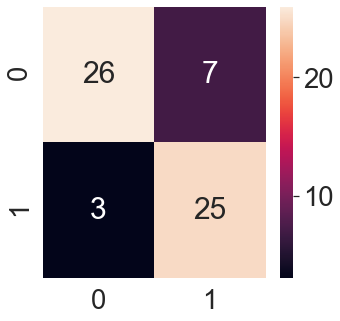

In [157]:
y_pred=model.predict(X_test_scaled)
y_pred =(y_pred>0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True)
plt.show()

In [159]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
Image(url ='https://3.bp.blogspot.com/--jLXutUe5Ss/VvPIO6ZH2tI/AAAAAAAACkU/pvVL4L-a70gnFEURcfBbL_R-GnhBR6f1Q/s1600/ConfusionMatrix.png', width=800, height=800)


Type I Error (FP) = 7

Type II Error (FN) = 3